# Evaluation : RMSLE 
##RMSLE 

- RMSE 에 log 씌운값
- 과대평가된 항목보다는 과소평과된 항목에 패널티를 준다
    - 예측값이 실제값보다 더 작을 때 큰 패널티 
- 오차(error)를 제곱(square)해서 평균(mean)한 값의 제곱근(root)으로 값이 작을수록 정밀도가 높다
- 0에 가까운 값이 나올 수록 정밀도가 높은값이다
- 값이 작을수록 오류가 적다는 의미

*배달 음식을 시킬 때 30분이 걸린다고 했는데 실제로 20분이 걸리는 건 큰 문제가 되지 않지만, 30분이 걸린다고 했는데 40분이 걸리면 고객이 화가 날 수 있습니다. 이럴 때 RMSLE를 적용할 수 있습니다.


- 1. 아웃라이어에 강건해진다
    RMSLE는 아웃라이어에 강건(Robust)합니다. 예를 들어보겠습니다.

    예측값 = 67, 78, 91, 실제값 = 60, 80, 90일 때, RMSE = 4.242, RMSLE = 0.6466입니다.

    예측값 = 67, 78, 91, 102, 실제값 = 60, 80, 90, 750일 때 RMSE = 374.724, RMSLE = 1.160입니다. 750이라는 아웃라이어 때문에 RMSE는 굉장히 증가했지만 RMSLE의 증가는 미미합니다. RMSLE는 아웃라이어가 있더라도 값의 변동폭이 크지 않습니다. 따라서 RMSLE는 아웃라이어에 강건하다고 말할 수 있습니다.

- 2. 상대적 Error를 측정해준다.

    예측값과 실제값에 로그를 취해주면 로그 공식에 의해 아래와 같이 상대적 비율을 구할 수 있습니다.

    예측값 = 100, 실제값 = 90일 때, RMSLE = 0.1053, RMSE = 10입니다.

    예측값 = 10,000, 실제값 = 9,000일 때, RMSLE = 0.1053, RMSE = 1,000입니다.

    보시는 바와 같이 값의 절대적 크기가 변하더라도 상대적 크기가 동일하다면 RMSLE 값도 동일합니다. 반면, 상대적 크기가 동일하더라도 절대적 크기가 변하면 RMSE 값은 변합니다. 따라서 RMSE와 달리 RMSLE는 예측값과 실제값의 상대적 Error를 측정해줍니다.

3. Under Estimation에 큰 패널티를 부여한다.

    RMSLE는 Over Estimation보다 Under Estimation에 더 큰 패널티를 부여합니다. 즉, 예측값이 실제값보다 클 때보다 예측값이 실제값보다 작을 때 더 큰 패널티를 부여합니다.

    예측값 = 600, 실제값 = 1,000일 때 RMSE = 400, RMSLE = 0.510입니다.

    예측값 = 1,400, 실제값 = 1,000일 때 RMSE = 400, RMSLE = 0.33입니다.

    예측값과 실제값의 차이는 둘 다 400입니다. Over Estimation이든 Under Estimation이든 RMSE값은 동일합니다. 하지만 RMSLE는 Under Estimation일 때 (즉, 예측값이 실제값보다 작을 때) 더 높은 페널티가 주어집니다.
    *배달 음식을 시킬 때 30분이 걸린다고 했는데 실제로 20분이 걸리는 건 큰 문제가 되지 않지만, 30분이 걸린다고 했는데 40분이 걸리면 고객이 화가 날 수 있습니다. 이럴 때 RMSLE를 적용할 수 있습니다.



Cf) RMSE : 예측값과 실제값의 차 각각을 제곱한 값을 평균 내고 , 루트를 씌운다 

# Description¶
- datetime - hourly date + timestamp
- season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

# EDA

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False


In [28]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape

test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

(6493, 9)

In [29]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
train.isnull().sum()

In [ ]:
# import missingno as msno

# msno.matrix(train,figsize=(12,5))

## datetime 

In [31]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day 
train['hour']=train['datetime'].dt.hour


train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second

train.shape


(10886, 18)

In [32]:
dir(train['temp'])

train['temp'].mean()

20.230859819952173

In [33]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


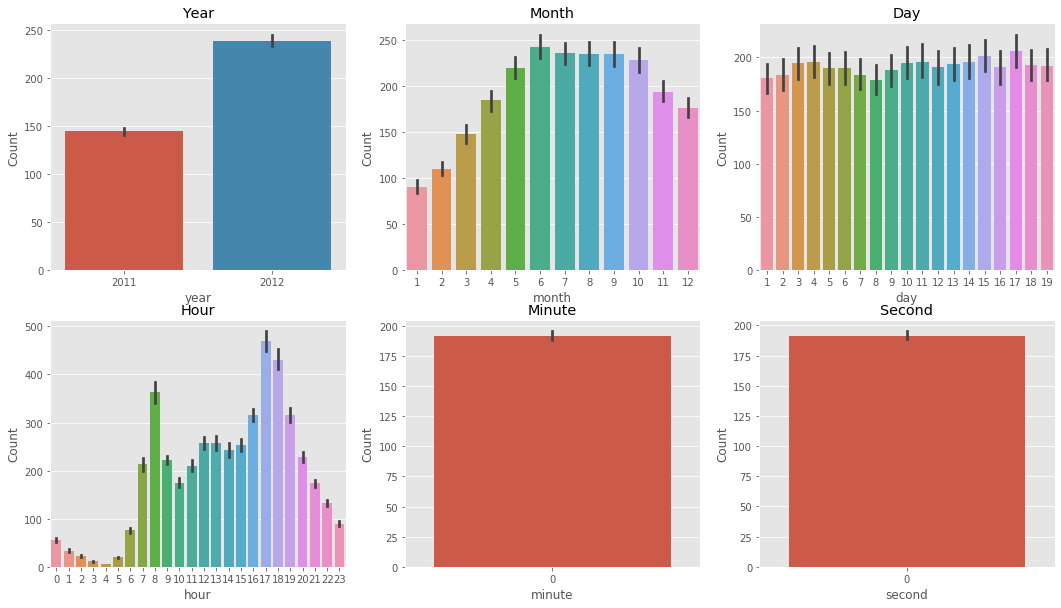

In [34]:
figure,((ax1,ax2,ax3),(ax4,ax5,ax6)) =plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,10)


sns.barplot(data =train,x="year",y='count',ax=ax1)
sns.barplot(data =train,x='month',y='count',ax=ax2)
sns.barplot(data=train,x='day',y='count',ax=ax3)
sns.barplot(data=train,x='hour',y='count',ax=ax4)
sns.barplot(data=train,x='minute',y='count',ax=ax5)
sns.barplot(data=train,x='second',y='count',ax=ax6)

ax1.set(ylabel='Count',title='Year')
ax2.set(ylabel='Count',title='Month')
ax3.set(ylabel='Count',title='Day')
ax4.set(ylabel='Count',title='Hour')
ax5.set(ylabel='Count',title='Minute')
ax6.set(ylabel='Count',title='Second')

plt.savefig("./images/datetime_feature_1")

### result
- 연도별 대여량은 2011년 보다 2012년이 더 많다.
- 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
- 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
- 분, 초도 다 0이기 때문에 의미가 없다.


## 상황별 count

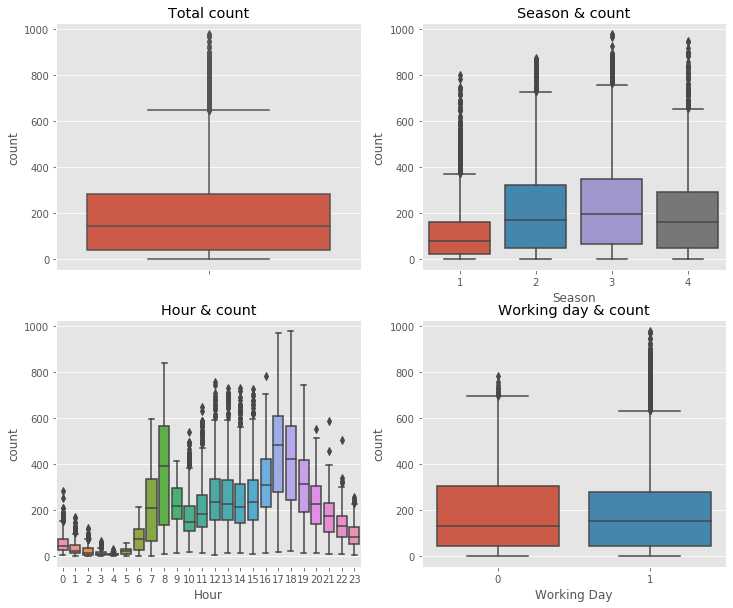

In [35]:
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train,y='count',orient='v',ax=axes[0][0])
sns.boxplot(data=train,y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data=train,y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data=train,y='count',x='workingday',orient='v',ax=axes[1][1])

axes[0][0].set(ylabel='count',title='Total count')
axes[0][1].set(xlabel='Season',title='Season & count')
axes[1][0].set(xlabel='Hour',title='Hour & count')
axes[1][1].set(xlabel='Working Day',title='Working day & count')

plt.savefig('./images/count_per_2')

In [36]:
#요일 추가 #시간별 대여량 => 출퇴근 상위 => 주말을 추가해보자!
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [37]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

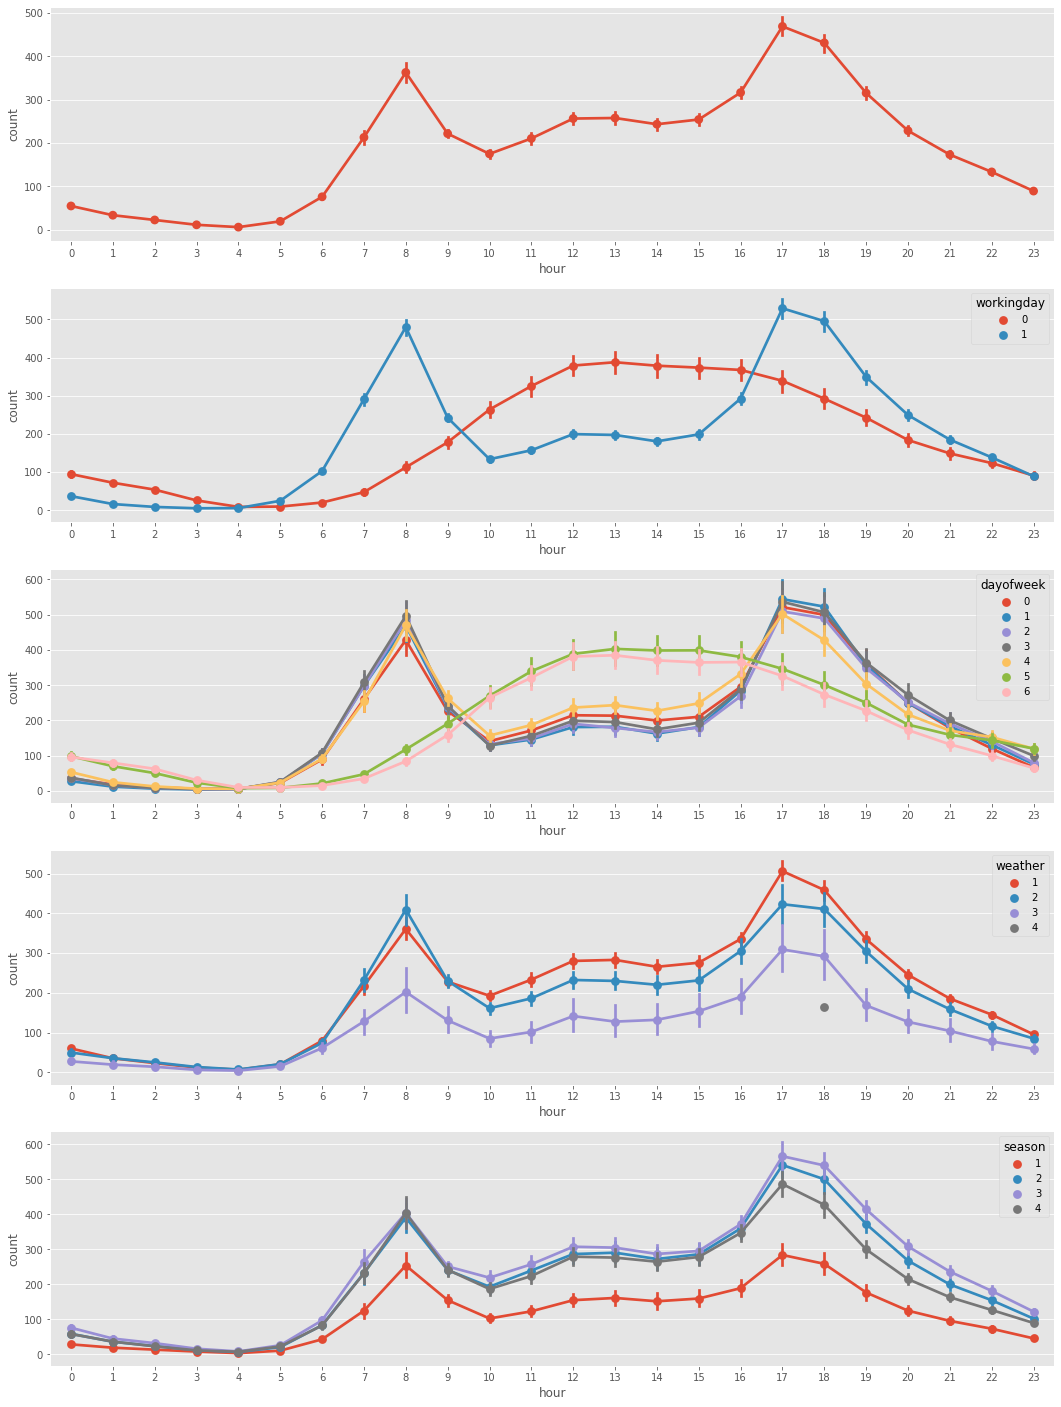

In [38]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)


plt.savefig('./images/시간대별 사용3')

### result
- 전체 사용 출퇴근시간에 높다
- 출근이 아닐때(주말)에는 오후시간대가 사용비중이 높다
- 날씨가 좋을수록 사용빈도가 높다
- 3->2->4->1

## 상관관계 

In [39]:
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


In [40]:
print(mask)

[[ 0.          0.98494811  0.46709706  0.31857128 -0.06494877 -0.01785201
   0.39445364]
 [ 0.          0.          0.46206654  0.31463539 -0.04353571 -0.057473
   0.38978444]
 [ 0.          0.          0.          0.49724969 -0.3481869   0.09227619
   0.69041357]
 [ 0.          0.          0.          0.         -0.26545787  0.09105166
   0.97094811]
 [ 0.          0.          0.          0.          0.         -0.31860699
  -0.31737148]
 [ 0.          0.          0.          0.          0.          0.
   0.10136947]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]


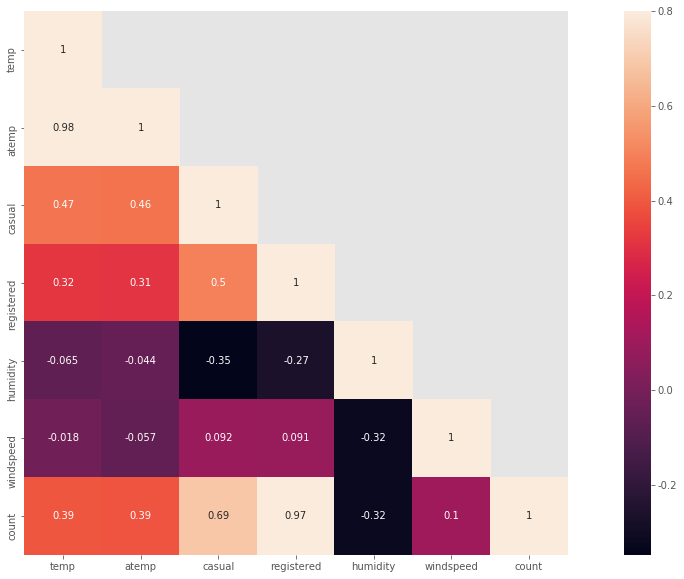

In [41]:

fig,ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt,mask=mask,vmax=0.8,square=True,annot=True)

plt.savefig('./images/heatmap4')

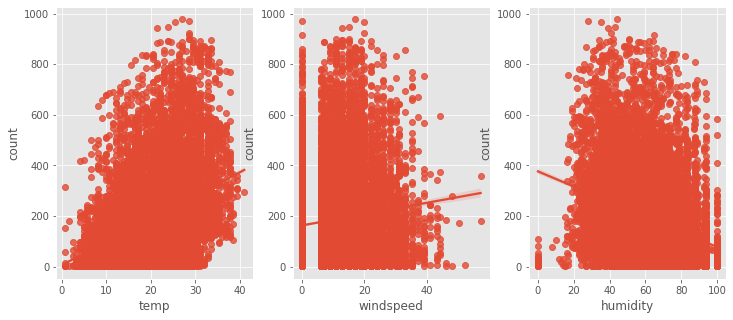

In [42]:
#온도 풍속 습도
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data=train,ax=ax1)
sns.regplot(x='windspeed',y='count',data=train,ax=ax2)
sns.regplot(x='humidity',y='count',data=train,ax=ax3)

plt.savefig('./images/temp_humidity_windspeed5')

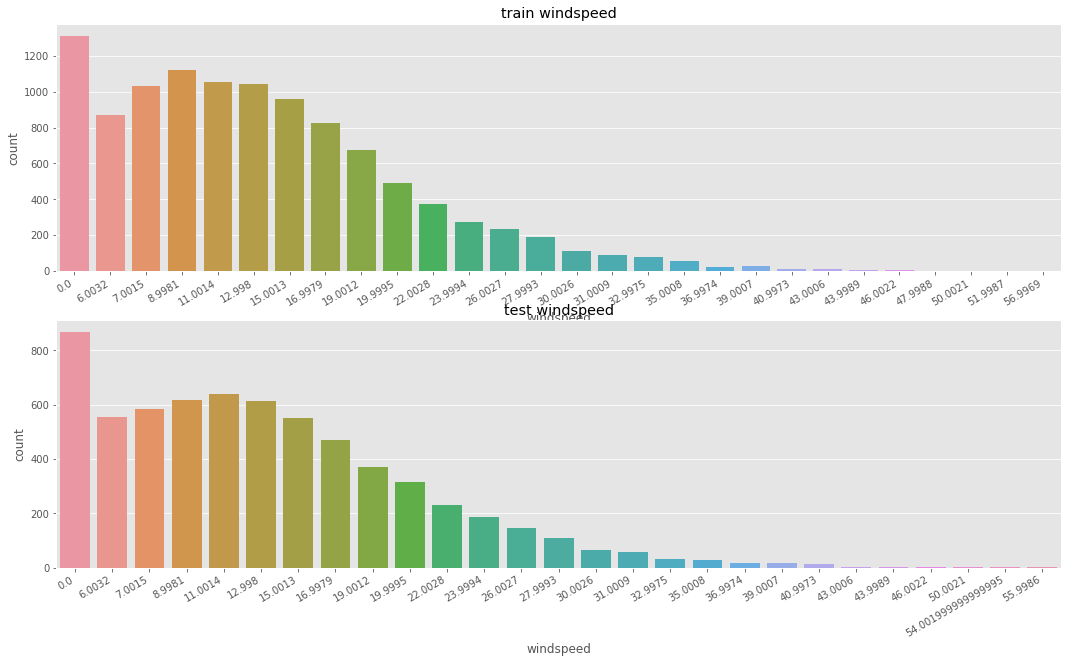

In [43]:
#풍속 시각화
fig,axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30,ha='right')
axes[0].set(ylabel='Count',title = 'train windspeed')
sns.countplot(data=train,x='windspeed',ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30,ha='right')
axes[1].set(ylabel='count',title='test windspeed')
sns.countplot(data=test,x='windspeed',ax=axes[1])

plt.savefig('./images/5-1windspeed')

### result
- temp atemp 상관관계 높다 둘중 하나만
- 등록된 사용자 -count간 높음 but test데이터에없다
- 온도  풍속 습도 상관관계 낮다

- 풍속이 0인 값이 아주 많다 => 관측 불가시 0으로?..
    - 바람은 기압차로 공기의 이동이다. 0이될 수 없음

## 2011 2012 월별 비교

In [48]:
def concat_year_month(datetime):
    return '{0}-{1}'.format(datetime.year,datetime.month)

train['year_month']=train['datetime'].apply(concat_year_month)

print(train.shape)
train[['datetime','year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


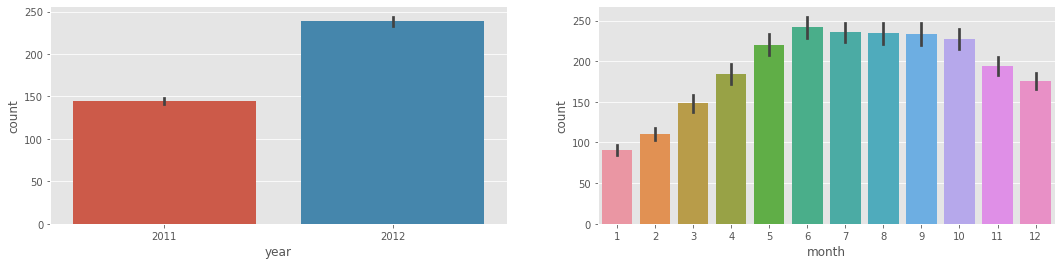

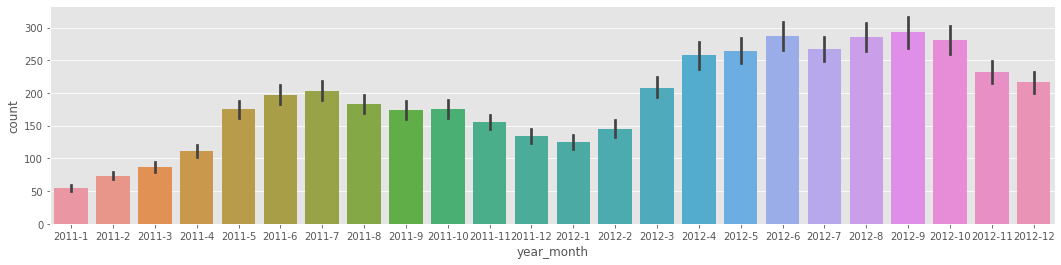

In [49]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

plt.savefig('./images/6yearmonth_compare')
fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)


plt.savefig('./images/7month_compare')

In [50]:
# #온도  비교  별차이없음
# fig, ax3 = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(18, 4)

# sns.barplot(data=train, x="year_month", y="temp", ax=ax3)


# plt.savefig('./images/8temp_compare')


In [51]:
# #weather compare
# fig, ax4 = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(18, 4)

# sns.barplot(data=train, x="year_month", y="weather", ax=ax4)


# plt.savefig('./images/9weather_compare')


### result
- 2012의 대여량이 높다
- 따듯할때 대여량이 높다
- 전체적으로 2012가 높다ㅡ

In [ ]:
# a=temp_avg['year_month'].str.split('-')[:,1]

NameError: name 'temp_avg' is not defined

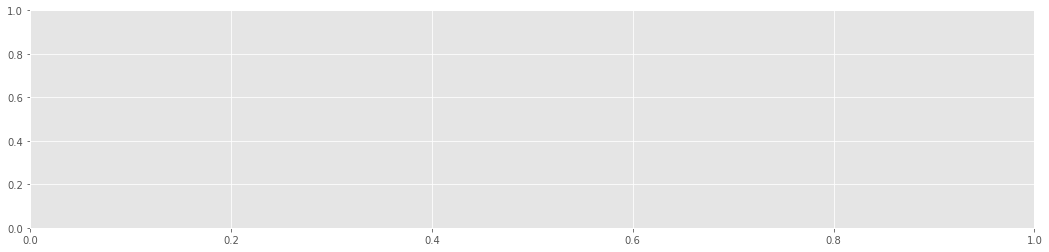

In [47]:
# fig, ax3 = plt.subplots(nrows=1, ncols=1)
# fig.set_size_inches(18, 4)

# sns.barplot(data=temp_avg, x="year_month", y="temp", ax=ax3)


## outlier

- 통계학에서 68-95-99.7 규칙(영어: 68-95-99.7 rule)은 정규 분포를 나타내는 규칙으로, 경험적인 규칙(empirical rule)이라고도 한다. 3시그마 규칙(three-sigma rule)이라고도 하는데 이 때는 평균에서 양쪽으로 3표준편차의 범위에 거의 모든 값들(99.7%)이 들어간다는 것을 나타낸다.

- 약 68%의 값들이 평균에서 양쪽으로 1 표준편차 범위(μ±σ)에 존재한다.
- 약 95%의 값들이 평균에서 양쪽으로 2 표준편차 범위(μ±2σ)에 존재한다.
- 거의 모든 값들(실제로는 99.7%)이 평균에서 양쪽으로 3표준편차 범위(μ±3σ)에 존재한다.
- 

- 
- https://programmers.co.kr/learn/questions/2351
- 3번을 보시면, 아웃라이어를 |값-평균| >= 3표준편차 인 것으로 설정했습니다.




In [54]:
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

#ㅇ이상치 147개 제거

(10886, 20)
(10739, 20)


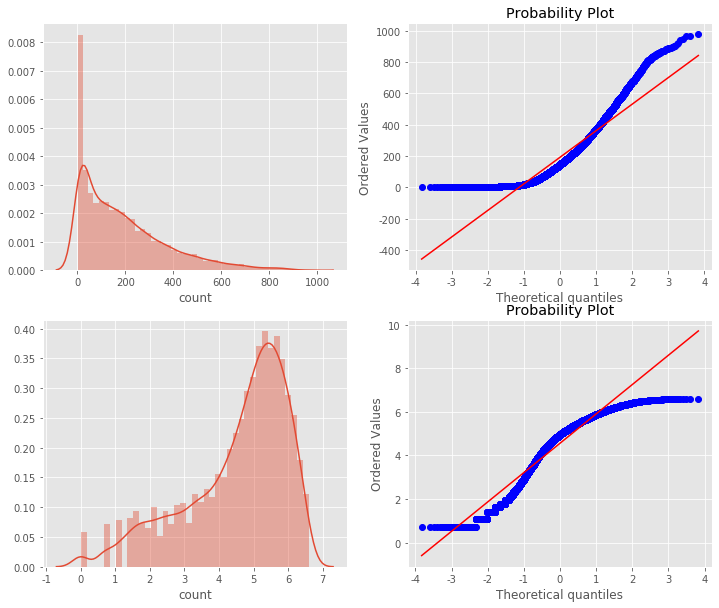

In [55]:
figure ,axes = plt.subplots(ncols =2,nrows =2)
figure.set_size_inches(12,10)

sns.distplot(train['count'],ax =axes[0][0])
stats.probplot(train['count'],dist='norm',fit=True,plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']),ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']),dist='norm',fit=True,plot=axes[1][1])


plt.savefig('./images/7outliers_bf_af')

### result
- count변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.



# Feature Engineering

In [ ]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape



test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape


test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

## windspeed

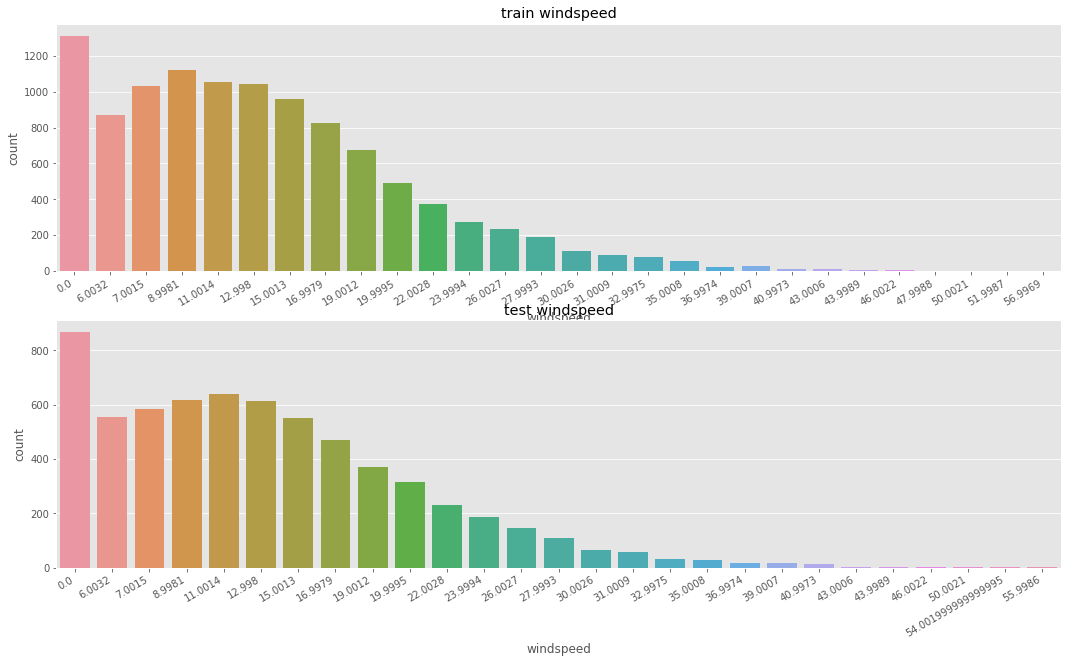

In [56]:
# widspeed 풍속에 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train, x="windspeed", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='Count',title="test windspeed")
sns.countplot(data=test, x="windspeed", ax=axes[1])

## FEATURE SELECTION

### 1번시도  - 0.33087
- windspeed 안건드림
- feature selection


In [ ]:
#연속형  범주형
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.

categorical_feature_names =['season','holiday','workingday','weather',
                           'dayofweek','month','year','hour']
for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype("category")

feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

X_train = train[feature_names]

print(X_train.shape)
X_train.head()


X_test = test[feature_names]

print(X_test.shape)
X_test.head()


label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()


y_train

## rmsle

In [ ]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer


## cross validaiton

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


# Random forest

## 1번시도 -0.33087

In [ ]:
#연속형  범주형
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.

categorical_feature_names =['season','holiday','workingday','weather',
                           'dayofweek','month','year','hour']
for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype("category")

In [ ]:
    
    ########변수 선택################################################
    
    
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

X_train = train[feature_names]

print(X_train.shape)
X_train.head()


X_test = test[feature_names]

print(X_test.shape)
X_test.head()


label_name = "count"

y_train = train[label_name]

print(y_train.shape)
y_train.head()


y_train

In [ ]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

In [ ]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

In [ ]:
### train

In [ ]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

In [ ]:
### predict

In [ ]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:10]

### 시각화

In [ ]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

plt.savefig('./predict1')

### SUubmit -0.41831

In [ ]:
submission = pd.read_csv("./sampleSubmission.csv")
submission

submission["count"] = predictions

print(submission.shape)
submission.head()

submission.to_csv("./Score_{0:.5f}_1st_submission.csv".format(score), index=False)


## 2번시도 - 0.33339

변수 8개
- atemp 제거
- windspeed 제거 - heatmap 0.013
- working day 제거 : dayofweek이 대변해줌

In [ ]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape



test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape


test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

#ㅇ이상치 147개 제거

In [ ]:
feature_names2 = ["season", "weather", "temp", "humidity", "year", "hour", "dayofweek", "holiday"]


In [ ]:
X_train2= trainWithoutOutliers[feature_names2]

In [ ]:
X_train2

In [ ]:
X_test2 = test[feature_names2]

print(X_test2.shape)
X_test2.head()

In [ ]:
label_name = "count"

y_train2 = trainWithoutOutliers[label_name]

print(y_train2.shape)
y_train2.head()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

In [ ]:
%time score = cross_val_score(model, X_train2, y_train2, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

### train

In [ ]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train2, y_train2)

### predict

In [ ]:
predictions2 = model.predict(X_test2)

print(predictions2.shape)
predictions2[0:10]

### 시각화

In [ ]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train2,ax=ax1,bins=50)
ax1.set(title="train2")
sns.distplot(predictions2,ax=ax2,bins=50)
ax2.set(title="test2")
plt.savefig('./predict2')

 ### submit 0.42598

In [ ]:
submission2 = pd.read_csv("./sampleSubmission.csv")
submission2

submission2["count"] = predictions2

print(submission2.shape)
submission2.head()

submission2.to_csv("./Score_{0:.5f}_2nd_submission.csv".format(score), index=False)


## 3번시도 -0.33081
- windspeed ml 돌리기 
- 전체변수   and 2번시도 변수

### windspeed ml

In [ ]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape



test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape


test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

#ㅇ이상치 147개 제거

### 분리

In [ ]:
from sklearn.ensemble import RandomForestRegressor

windspeed_0 = trainWithoutOutliers[trainWithoutOutliers.windspeed ==0]
windspeed_Not0 = trainWithoutOutliers[trainWithoutOutliers.windspeed !=0]

#도출해야할 x
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered',
                                   'count','datetime'],axis=1)


#학습하는 x
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered',
                                        'count','datetime'],axis=1)
#학습하는 y
windspeed_Not0_series = windspeed_Not0['windspeed']



### 예측

In [ ]:
rf =RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)

predicted_windspeed_0 = rf.predict(windspeed_0_df)


#예측한값 원래에 대입
windspeed_0['windspeed']= predicted_windspeed_0

In [ ]:
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

### heat map

In [ ]:
fig = plt.figure(figsize=[20,20])
ax= sns.heatmap(train.corr(),annot=True,square=True)

plt.savefig('./windspeed heatmap')

### test에 wind값 대입

In [ ]:
windspeed_0 = test[test.windspeed ==0]
windspeed_Not0 = test[test.windspeed !=0]

#도출해야할 x
windspeed_0_df = windspeed_0.drop(['windspeed','datetime'],axis=1)


#학습하는 x
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','datetime'],axis=1)
#학습하는 y
windspeed_Not0_series = windspeed_Not0['windspeed']

rf =RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)

predicted_windspeed_0 = rf.predict(windspeed_0_df)


#예측한값 원래에 대입
windspeed_0['windspeed']= predicted_windspeed_0

test = pd.concat([windspeed_0,windspeed_Not0],axis=0)


In [ ]:
test.head()

### feature 선정

In [ ]:
train.head()

In [ ]:
train.shape

In [ ]:
categorical_feature_names =['season','holiday','workingday','weather',
                           'dayofweek','month','year','hour']
for var in categorical_feature_names:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype("category")


In [ ]:
    
feature_names3 = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]


In [ ]:
X_train3 = train[feature_names3]

print(X_train3.shape)
X_train3.head()


In [ ]:
X_test3 = test[feature_names3]

print(X_test3.shape)
X_test3.head()



In [ ]:

label_name = "count"

y_train3 = train[label_name]

print(y_train3.shape)
y_train3.head()


y_train3

In [ ]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model


### crossval

In [ ]:
%time score = cross_val_score(model, X_train3, y_train3, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))


In [ ]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train3, y_train3)

predictions3 = model.predict(X_test3)

print(predictions3.shape)
predictions3[0:10]


In [ ]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train3,ax=ax1,bins=50)
ax1.set(title="train3")
sns.distplot(predictions3,ax=ax2,bins=50)
ax2.set(title="test3")

plt.savefig('./predict3-1')



### 3rd submission -1.90105

In [ ]:
submission3 = pd.read_csv("./sampleSubmission.csv")
submission3

submission3["count"] = predictions3

print(submission3.shape)
submission3.head()

submission3.to_csv("./Score_{0:.5f}_3rd-1_submission.csv".format(score), index=False)


## 4번시도

- windspeed를 casual 과 registered 기반으로 

In [ ]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape



test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape


test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

#ㅇ이상치 147개 제거

In [ ]:
train.shape()

In [ ]:
trainWithoutOutliers.iloc[1,:]

In [ ]:
windspeed_0

In [ ]:
from sklearn.ensemble import RandomForestRegressor

windspeed_0 =trainWithoutOutliers[trainWithoutOutliers.windspeed ==0]
windspeed_Not0 = trainWithoutOutliers[trainWithoutOutliers.windspeed != 0]

windspeed_0_df = windspeed_0.drop(['datetime','season','holiday','workingday','weather',
                                  'weather','weather','temp','atemp','humidity','windspeed','count',
                                  'year','month','day','hour','minute','second','dayofweek'],axis=1)

windspeed_Not0_df = windspeed_Not0.drop(['datetime','season','holiday','workingday','weather',
                                  'weather','weather','temp','atemp','humidity','windspeed','count',
                                  'year','month','day','hour','minute','second','dayofweek'],axis=1)

windspeed_Not0_series = windspeed_Not0['windspeed']


In [ ]:
rf = RandomForestRegressor()

rf.fit(windspeed_Not0_df,windspeed_Not0_series)

predicted_windspeed_0 = rf.predict(windspeed_0_df)

In [ ]:
windspeed_0['windspeed']=predicted_windspeed_0

In [ ]:
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

plt.savefig('./images/countregis_windspeed')

In [ ]:
feature_names4 = ['temp','humidity','year','hour','season','weather','windspeed','month']

In [ ]:
X_train4 = trainWithoutOutliers[feature_names4]
print(X_train4.shape)
X_train4.head()

In [ ]:
X_test4 =test[feature_names4]

print(X_test4.shape)
X_test4.head()


In [ ]:

label_name = 'count'

y_train4 = trainWithoutOutliers[label_name]
print(y_train4.shape)
y_train4.head()

y_train4

### modeling 0.61172

In [57]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
%time score = cross_val_score(model, X_train4, y_train4, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))


NameError: name 'cross_val_score' is not defined

Score= 0.20488


In [59]:
# 학습시킴, 피팅(옷을 맞출 때 사용하는 피팅을 생각함) - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train4, y_train4)

predictions4 = model.predict(X_test4)

print(predictions4.shape)
predictions4[0:10]


NameError: name 'X_train4' is not defined

In [ ]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train4,ax=ax1,bins=50)
ax1.set(title="train4")
sns.distplot(predictions4,ax=ax2,bins=50)
ax2.set(title="test4")

plt.savefig('./predict4')


## 5번- 0.68060

In [ ]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape



test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape


test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

#ㅇ이상치 147개 제거

In [ ]:
feature_names5=['temp','humidity','year','hour']


In [ ]:
X_train5 = trainWithoutOutliers[feature_names5]

print(X_train5.shape)

X_train5.head()

In [ ]:
X_test5 = test[feature_names5]

X_test5.shape

In [ ]:
label_name = 'count'

y_train5 = trainWithoutOutliers[label_name]

In [ ]:

from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model


In [ ]:

%time score = cross_val_score(model, X_train5, y_train5, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))


In [ ]:
model.fit(X_train5,y_train5)

predictions5 = model.predict(X_test5)



# 6번째 casual / registered

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('./train.csv',parse_dates=['datetime'])
test = pd.read_csv('./test.csv',parse_dates=['datetime'])

In [ ]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek


In [ ]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.shape


In [ ]:
rfModel_wind = RandomForestRegressor()
f_columns = ['season','weather','humidity','month','temp','year','hour','dayofweek','atemp']
X_train = train[f_columns]
y_r_label = train['registered']
y_c_label = train['casual']
print(X_train.shape)
print(y_r_label.shape)
print(y_c_label.shape)

In [ ]:
X_test = test[f_columns]
X_test.shape


## registered 예측

In [ ]:
rfModel = RandomForestRegressor()
rfModel.fit(X_train, y_r_label)


In [ ]:
testRegisteredValues = rfModel.predict(X_test)


In [ ]:
test['registered'] = testRegisteredValues
test['registered']

## casual 예측

In [ ]:
rfModel.fit(X_train,y_c_label)

In [ ]:
testCasualValues = rfModel.predict(X_test)
test['casual'] =testCasualValues
test['casual']

## count 생성

In [ ]:
test['count'] = test['casual']+test['registered']

In [ ]:
test['count']=test['count'].round(0)

In [ ]:
test['count'] = pd.to_numeric(test['count'])

In [ ]:
test['count'] = test['count'].astype('int64')

In [ ]:
test.info()

In [ ]:
test['count']

In [ ]:
test6 = test.drop(['count'],axis=1)

In [ ]:
test6.head()

## sub - kaggle 0.48366

In [ ]:
submission6 = pd.read_csv("./sampleSubmission.csv")
submission6

submission6["count"] = test['count']

print(submission6.shape)
submission6.head()

submission3.to_csv("./Score_{0:.5f}_6th_submission.csv".format(score), index=False)


In [ ]:
fig = plt.figure(figsize=[20,20])
ax= sns.heatmap(test6.corr(),annot=True,square=True)

plt.savefig('./test6 heatmap')

# 7 최적화 -> 1번쨰거로 =0.9786969904386712

In [2]:
train = pd.read_csv('./train.csv',parse_dates =['datetime'])
train.shape

test = pd.read_csv('./test.csv',parse_dates=['datetime'])
test.shape

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape


test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [4]:
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

#이상치 147개 제거

(10886, 19)
(10739, 19)


In [5]:
categorical_feature_names =['season','holiday','workingday','weather',
                           'dayofweek','month','year','hour']
for var in categorical_feature_names:
    train[var] = trainWithoutOutliers[var].astype('category')
    test[var] = test[var].astype("category")

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10739 non-null  category      
 2   holiday     10739 non-null  category      
 3   workingday  10739 non-null  category      
 4   weather     10739 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10739 non-null  category      
 13  month       10739 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10739 non-null  category      
 16  minute      10886 non-

In [7]:
feature_names7 = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names7

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

## xy 만들기

In [8]:
X_train7 = trainWithoutOutliers[feature_names7]

print(X_train7.shape)
X_train7.head()

(10739, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,0.0,2011,0,5,0,0
1,1,1,9.02,13.635,80,0.0,2011,1,5,0,0
2,1,1,9.02,13.635,80,0.0,2011,2,5,0,0
3,1,1,9.84,14.395,75,0.0,2011,3,5,0,0
4,1,1,9.84,14.395,75,0.0,2011,4,5,0,0


In [9]:
X_test7 = test[feature_names7]

print(X_test7.shape)
X_test7.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [10]:
label_name = "count"

y_train7 = trainWithoutOutliers[label_name]

print(y_train7.shape)
y_train7.head()


y_train7

(10739,)


0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10739, dtype: int64

## 검증 함수만들기

In [14]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

## linear

- 선형회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘
- 선형회귀는 예측과 훈련 세트에 있는 타깃 y사이의 평균제곱오차(MSE)를 최소화하는 파라미터 w와 b를 찾는다.
- 매개변수가 없는 것이 장점이지만, 모델의 복잡도를 제어할 수 없다는 단점이 있다.
- 아래 위키피디아에서 가져 온 그래프에서 파란선이 선형회귀 모델을 나타내고 빨간점들이 훈련데이터를 나타낸다.


In [12]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [17]:
X_train7.isnull().sum()

season        0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
hour          0
dayofweek     0
holiday       0
workingday    0
dtype: int64

In [18]:
lModel = LinearRegression()

# 모델을 학습시킨다.
y_train7_log = np.log1p(y_train7)
lModel.fit(X_train7, y_train7_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
preds= lModel.predict(X_train7)
print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train7_log),np.exp(preds), False))
# RMSLE Value For Linear Regression:  0.9803697923313522

RMSLE Value For Linear Regression:  0.9786969904386712


In [22]:
preds

array([2.3181623 , 2.39742105, 2.49515504, ..., 5.63503971, 5.74421993,
       5.75472485])

### test : 0.9787 / kaggle 1.09158

## Ridge
- 선형회귀에서 얼마나 규제할지를 정하는게 알파값. 알파가 0이라면 리니어와 같다
    - 알파가 크면 가중치가 0에 가까워진다 : 데이터의 평균을 지나는 수평선이된다
- 회귀를 위한 선형모델
- 가중치(w)의 모든 원소가 0에 가깝게 만들어 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
- Regularization(정규화)는 오버피팅(과대적합)이 되지 않도록 모델을 강제로 제한한다는 의미
- max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.


In [16]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train7_log = np.log1p(y_train7)

grid_ridge_m.fit( X_train7, y_train7_log )
preds = grid_ridge_m.predict(X_train7)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train7_log),np.exp(preds), False))

df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9786969881901861


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011850,0.008342,0.003990,0.000629,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.010436,-0.901095,-1.027638,-1.028529,-0.970505,-0.987640,0.048114,1
1,0.007576,0.001501,0.002592,0.000489,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.010439,-0.901094,-1.027638,-1.028528,-0.970505,-0.987641,0.048115,2
2,0.006776,0.000968,0.003396,0.000785,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.010471,-0.901087,-1.027635,-1.028524,-0.970510,-0.987645,0.048119,3
3,0.008322,0.001474,0.003155,0.001107,2,3000,"{'alpha': 2, 'max_iter': 3000}",-1.010507,-0.901078,-1.027632,-1.028520,-0.970515,-0.987650,0.048124,4
4,0.006687,0.000399,0.003390,0.000488,3,3000,"{'alpha': 3, 'max_iter': 3000}",-1.010542,-0.901070,-1.027629,-1.028515,-0.970520,-0.987655,0.048129,5


In [25]:
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.987640
1,0.10,0.987641
2,1.00,0.987645
3,2.00,0.987650
4,3.00,0.987655


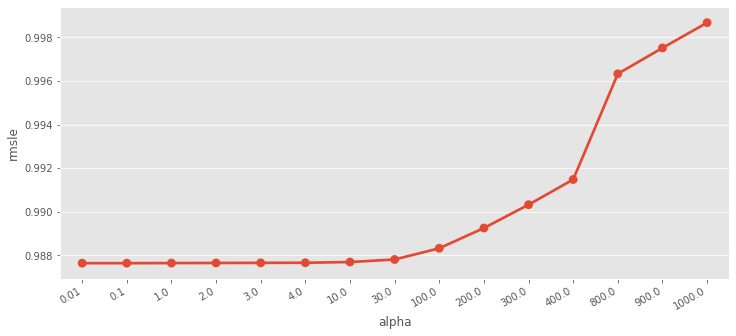

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

plt.savefig('./images/ridge')

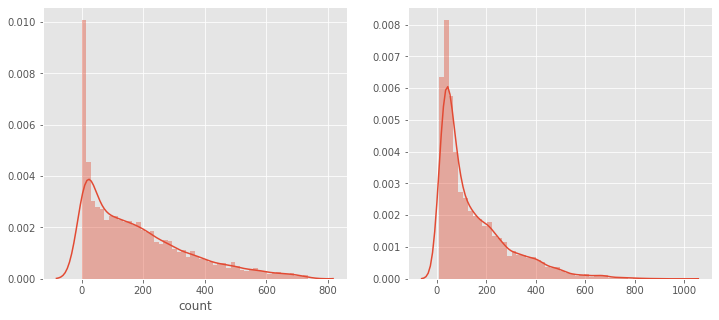

In [29]:
predsTest_ridge = grid_ridge_m.predict(X_test7)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train7,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest_ridge),ax=ax2,bins=50)

plt.savefig('./images/ridge')

In [31]:
submission7_ridge = pd.read_csv("./sampleSubmission.csv")
submission7_ridge

submission7_ridge["count"] = np.exp(predsTest_ridge)


In [32]:
print(submission7_ridge.shape)
submission7_ridge.head()


submission7_ridge.to_csv("./ridge_submission.csv", index=False)





(6493, 2)


### ### test : 0.9787 / kaggle 


## ensemble_ randomforest




In [ ]:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [17]:

from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=300)


y_train7_log = np.log1p(y_train7)
rfModel.fit(X_train7,y_train7_log)

preds = rfModel.predict(X_train7)
score = rmsle(np.exp(y_train7_log),np.exp(preds),False)
print('rmsle value for random forest',score)

# df = pd.DataFrame(grid_rf.cv_results_)
# df.head()


rmsle value for random forest 0.10517129714384184


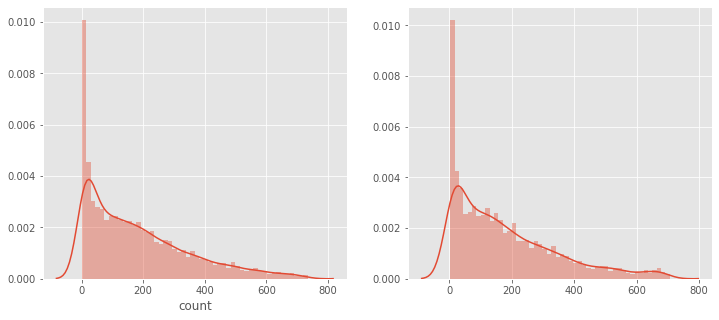

In [18]:

predsTest_rf = rfModel.predict(X_test7)

fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train7,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest_rf),ax=ax2,bins=50)

submission7_rf = pd.read_csv("./sampleSubmission.csv")
submission7_rf

submission7_rf["count"] = np.exp(predsTest_rf)

plt.savefig('./images/rfmodel')

In [20]:
print(submission7_rf.shape)
submission7_rf.head()


submission7_rf.to_csv('_rf_submission.csv', index=False)





(6493, 2)


### TEST: 1.052 / KAGGLE : 0.3976

In [26]:
rfModel = RandomForestRegressor(n_estimators=300)
rf_params = {'bootstrap': [True, False],
 'max_depth': [5,7,10,None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 300]}
grid_rf = GridSearchCV( rfModel,rf_params,scoring=rmsle_scorer,cv=5)


y_train7_log = np.log1p(y_train7)
grid_rf.fit(X_train7,y_train7_log)

preds = grid_rf.predict(X_train7)
score = rmsle(np.exp(y_train7_log),np.exp(preds),False)
print('rmsle value for random forest',score)

# df = pd.DataFrame(grid_rf.cv_results_)
# df.head()


KeyboardInterrupt: 

## lasso
- 선형회귀의 Regularization(규제)를 적용하는 대안
- 계수를 0에 가깝게 만들려고 하며 이를 L1규제라고 하며, 어떤 계수는 0이 되기도 하는데 이는 완전히 제외하는 피처가 생긴다는 의미다.
- 피처 선택이 자동으로 이루어진다고도 볼 수 있다.
- alpha 값의 기본 값은 1.0이며, 과소 적합을 줄이기 위해서는 이 값을 줄여야 한다.
- 그리드 서치로 아래 라쏘모델을 실행했을 때 베스트 알파값은 0.0025
- max_iter(반복 실행하는 최대 횟수)는 3000을 넣어주었다.


In [21]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train7)
grid_lasso_m.fit( X_train7 , y_train7_log )
preds = grid_lasso_m.predict(X_train7)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train7_log),np.exp(preds),False))

df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

df[["alpha", "rmsle"]].head()



{'alpha': 0.0025, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9786985884759303


,alpha,rmsle
0,10.000000,1.381703
1,1.000000,1.065428
2,0.500000,1.055497
3,0.333333,1.054206
4,0.250000,1.054501


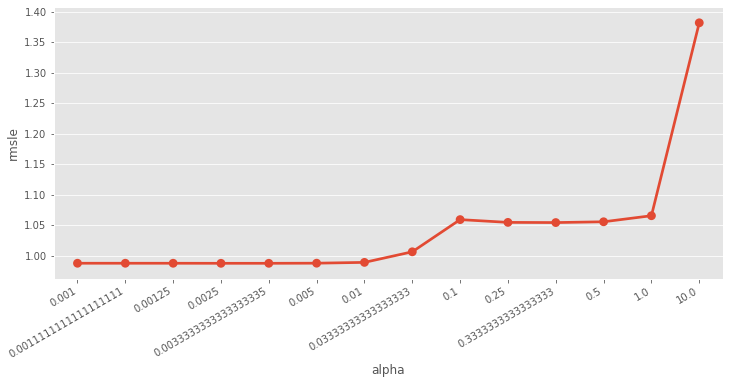

In [22]:
#시각화
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)
plt.savefig('./images/lasso')

## 그라디언부스트 (부스팅)
- https://excelsior-cjh.tistory.com/166
- https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-11-%EC%95%99%EC%83%81%EB%B8%94-%ED%95%99%EC%8A%B5-Ensemble-Learning-%EB%B0%B0%EA%B9%85Bagging%EA%B3%BC-%EB%B6%80%EC%8A%A4%ED%8C%85Boosting?category=1057680

 #랜덤포레스트(배깅)
- 부스팅은 배깅에 비해 error가 적습니다. 즉, 성능이 좋습니다. 하지만 속도가 느리고 오버 피팅이 될 가능성이 있습니다. 그렇다면 실제 사용할 때는 배깅과 부스팅 중 어떤 것을 선택해야 할까요? 상황에 따라 다르다고 할 수 있습니다. 개별 결정 트리의 낮은 성능이 문제라면 부스팅이 적합하고, 오버 피팅이 문제라면 배깅이 적합합니다.



In [23]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train7_log = np.log1p(y_train7)
gbm.fit(X_train7, y_train7_log)

preds = gbm.predict(X_train7)
score = rmsle(np.exp(y_train7_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score)


RMSLE Value For Gradient Boost:  0.20488100091465936


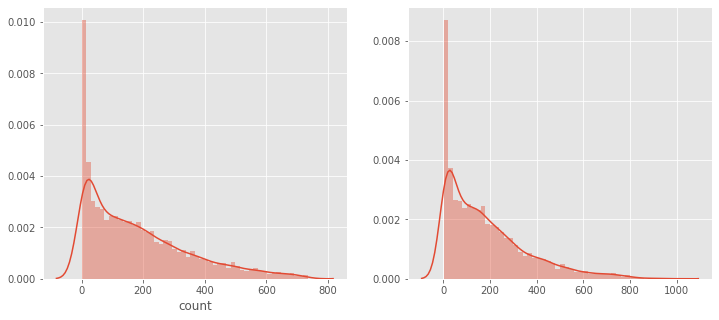

In [24]:
predsTest = gbm.predict(X_test7)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train7,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

### test: 0.2049  kaggle : 

In [25]:
submission = pd.read_csv("./sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest)

print(submission.shape)
submission.head()


submission.to_csv("./Gradientboost_submission.csv", index=False)


(6493, 2)
